## Load Julia packages (libraries) needed

In [1]:
using StatisticalRethinking
gr(size=(600,300))

loaded


Plots.GRBackend()

### snippet 2.6t

In [3]:
k = 6
n = 9

9

In [4]:
@model globe_toss(n, k) = begin
  #prior
  theta ~ Beta(1, 1)
  #model
  k ~ Binomial(n, theta)
  return k, theta
end

globe_toss (generic function with 3 methods)

### Compute the maximum_a_posteriori value

#### Set search bounds

In [5]:
lb = [0.0]
ub = [1.0]

1-element Array{Float64,1}:
 1.0

#### Create the model and compute the maximum_a_posteriori

In [6]:
model = globe_toss(n, k)
result = maximum_a_posteriori(model, lb, ub)
println("\nMaximum_a_posteriori = $(result.minimizer)\n")


Maximum_a_posteriori = [0.666667]



#### Use Turing mcmc

In [8]:
chn = sample(model, NUTS(1000, 0.65));

┌ Info: [Turing] looking for good initial eps...
└ @ Turing /Users/rob/.julia/dev/Turing/src/samplers/support/hmc_core.jl:246
[NUTS{Any}] found initial ϵ: 1.6
└ @ Turing /Users/rob/.julia/dev/Turing/src/samplers/support/hmc_core.jl:291
┌ Warning: Numerical error has been found in gradients.
└ @ Turing /Users/rob/.julia/dev/Turing/src/core/ad.jl:114
┌ Warning: grad = [NaN]
└ @ Turing /Users/rob/.julia/dev/Turing/src/core/ad.jl:115
[NUTS] Sampling... 47%  ETA: 0:00:01
  ϵ:         0.016701523745769768
  α:         0.2894157963047258
4m  pre_cond:  [0.281519]┌ Info:  Adapted ϵ = 0.41131566556569144, std = [0.281519]; 500 iterations is used for adaption.
└ @ Turing /Users/rob/.julia/dev/Turing/src/samplers/adapt/adapt.jl:87





[NUTS] Finished with
  Running time        = 1.6457072170000002;
  #lf / sample        = 0.006;
  #evals / sample     = 33.109;
  pre-cond. metric    = [0.281519].


[NUTS] Sampling...100% Time: 0:00:02


In [9]:
describe(chn[:theta])

Summary Stats:
Mean:           0.627309
Minimum:        0.238778
1st Quartile:   0.531620
Median:         0.635988
3rd Quartile:   0.733974
Maximum:        0.921187
Length:         1000
Type:           Float64


In [10]:
MCMCChain.hpd(chn[:theta], alpha=0.945) |> display

2-element Array{Float64,1}:
 0.634656800180927
 0.649057930301937

In [11]:
p_grid = range(0, step=0.001, stop=1)
prior = ones(length(p_grid))
likelihood = [pdf(Binomial(9, p), 6) for p in p_grid]
posterior = likelihood .* prior
posterior = posterior / sum(posterior)
samples = sample(p_grid, Weights(posterior), length(p_grid));

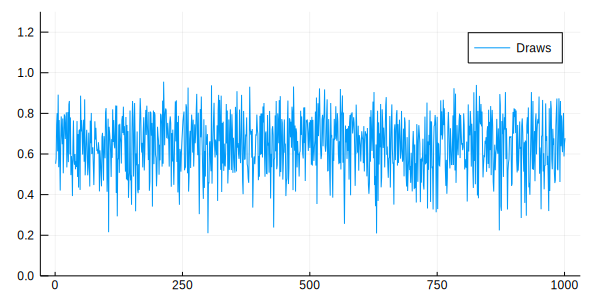

In [12]:
p = Vector{Plots.Plot{Plots.GRBackend}}(undef, 2)
p[1] = plot(1:length(p_grid), samples, markersize = 2, ylim=(0.0, 1.3), lab="Draws")

#### Analytical calculation

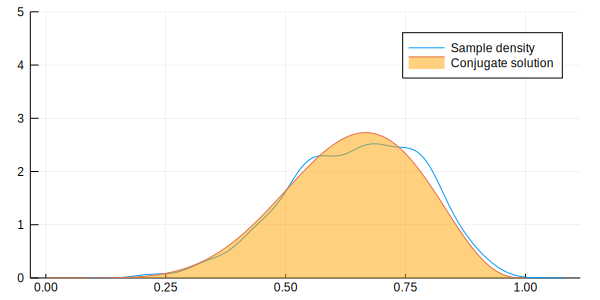

In [14]:
w = 6
n = 9
x = 0:0.01:1
p[2] = density(samples, ylim=(0.0, 5.0), lab="Sample density")
plot!(p[2], x, pdf.(Beta( w+1 , n-w+1 ) , x ), fill=(0, .5,:orange), lab="Conjugate solution")

#### Quadratic approximation

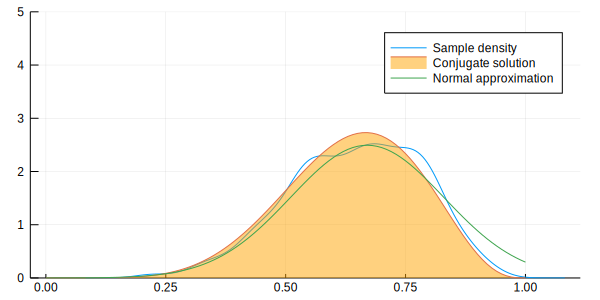

In [15]:
plot!( p[2], x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")

#### Show plots

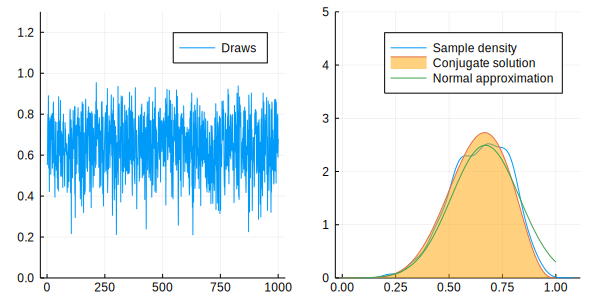

In [16]:
plot(p..., layout=(1, 2))

### ### snippet 2.7

#### analytical calculation

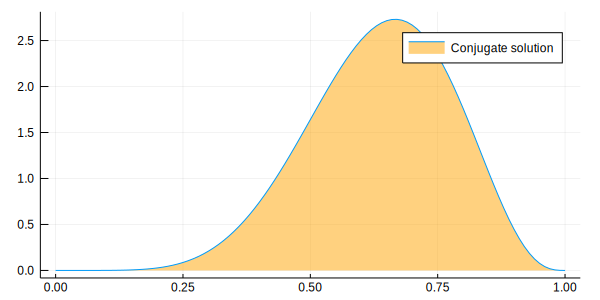

In [17]:
w = 6
n = 9
x = 0:0.01:1
plot( x, pdf.(Beta( w+1 , n-w+1 ) , x ), fill=(0, .5,:orange), lab="Conjugate solution")

#### quadratic approximation

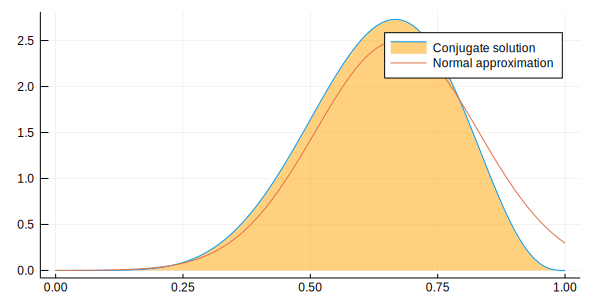

In [18]:
plot!( x, pdf.(Normal( 0.67 , 0.16 ) , x ), lab="Normal approximation")

#### Turing Chain

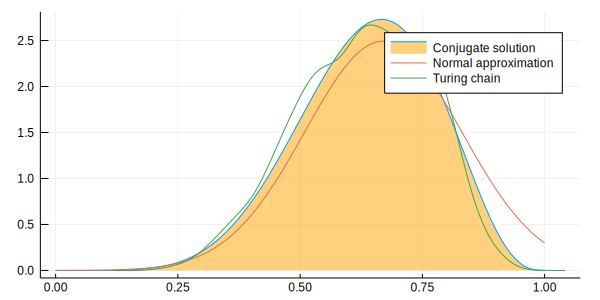

In [19]:
density!(chn[:theta], lab="Turing chain")

### snippet 2.8 

In [ ]:
# The example is in `stan_globe_toss.jl`. It will be in `clips_02_08_08s.jl`.